# 1. Getting started

Genome-level metabolic models (GEMs) computationally describe gene-protein reaction associations for entire metabolic pathways in an organism and can be simulated to predict metabolic fluxes for various system-level metabolic studies.Thus a GEM represents a compilation of transcriptomic, proteomic and metabolomic omics data sets. A metabolic network consists of two main components: the stoichiometric matrix (S-matrix) and a set of rules for gene-protein reaction relationships (GPR). The S-matrix consists of biochemical reactions that take place in an organism, while GPR relationships represent conditional statements in Boolean logic between open reading frames (ORFs) and their enzymatic functions in the S-matrix.

Flux balance analysis (FBA) is a mathematical procedure for simulating metabolism in genome-wide reconstructions of metabolic networks. This method uses linear programming to obtain the maximum potential of the target function under consideration, and therefore FBA is used to find a single solution to the optimisation problem. This is done by constraining the S-matrix of a genome-scale model by defining recording limits and setting lower and upper limits for reactions.

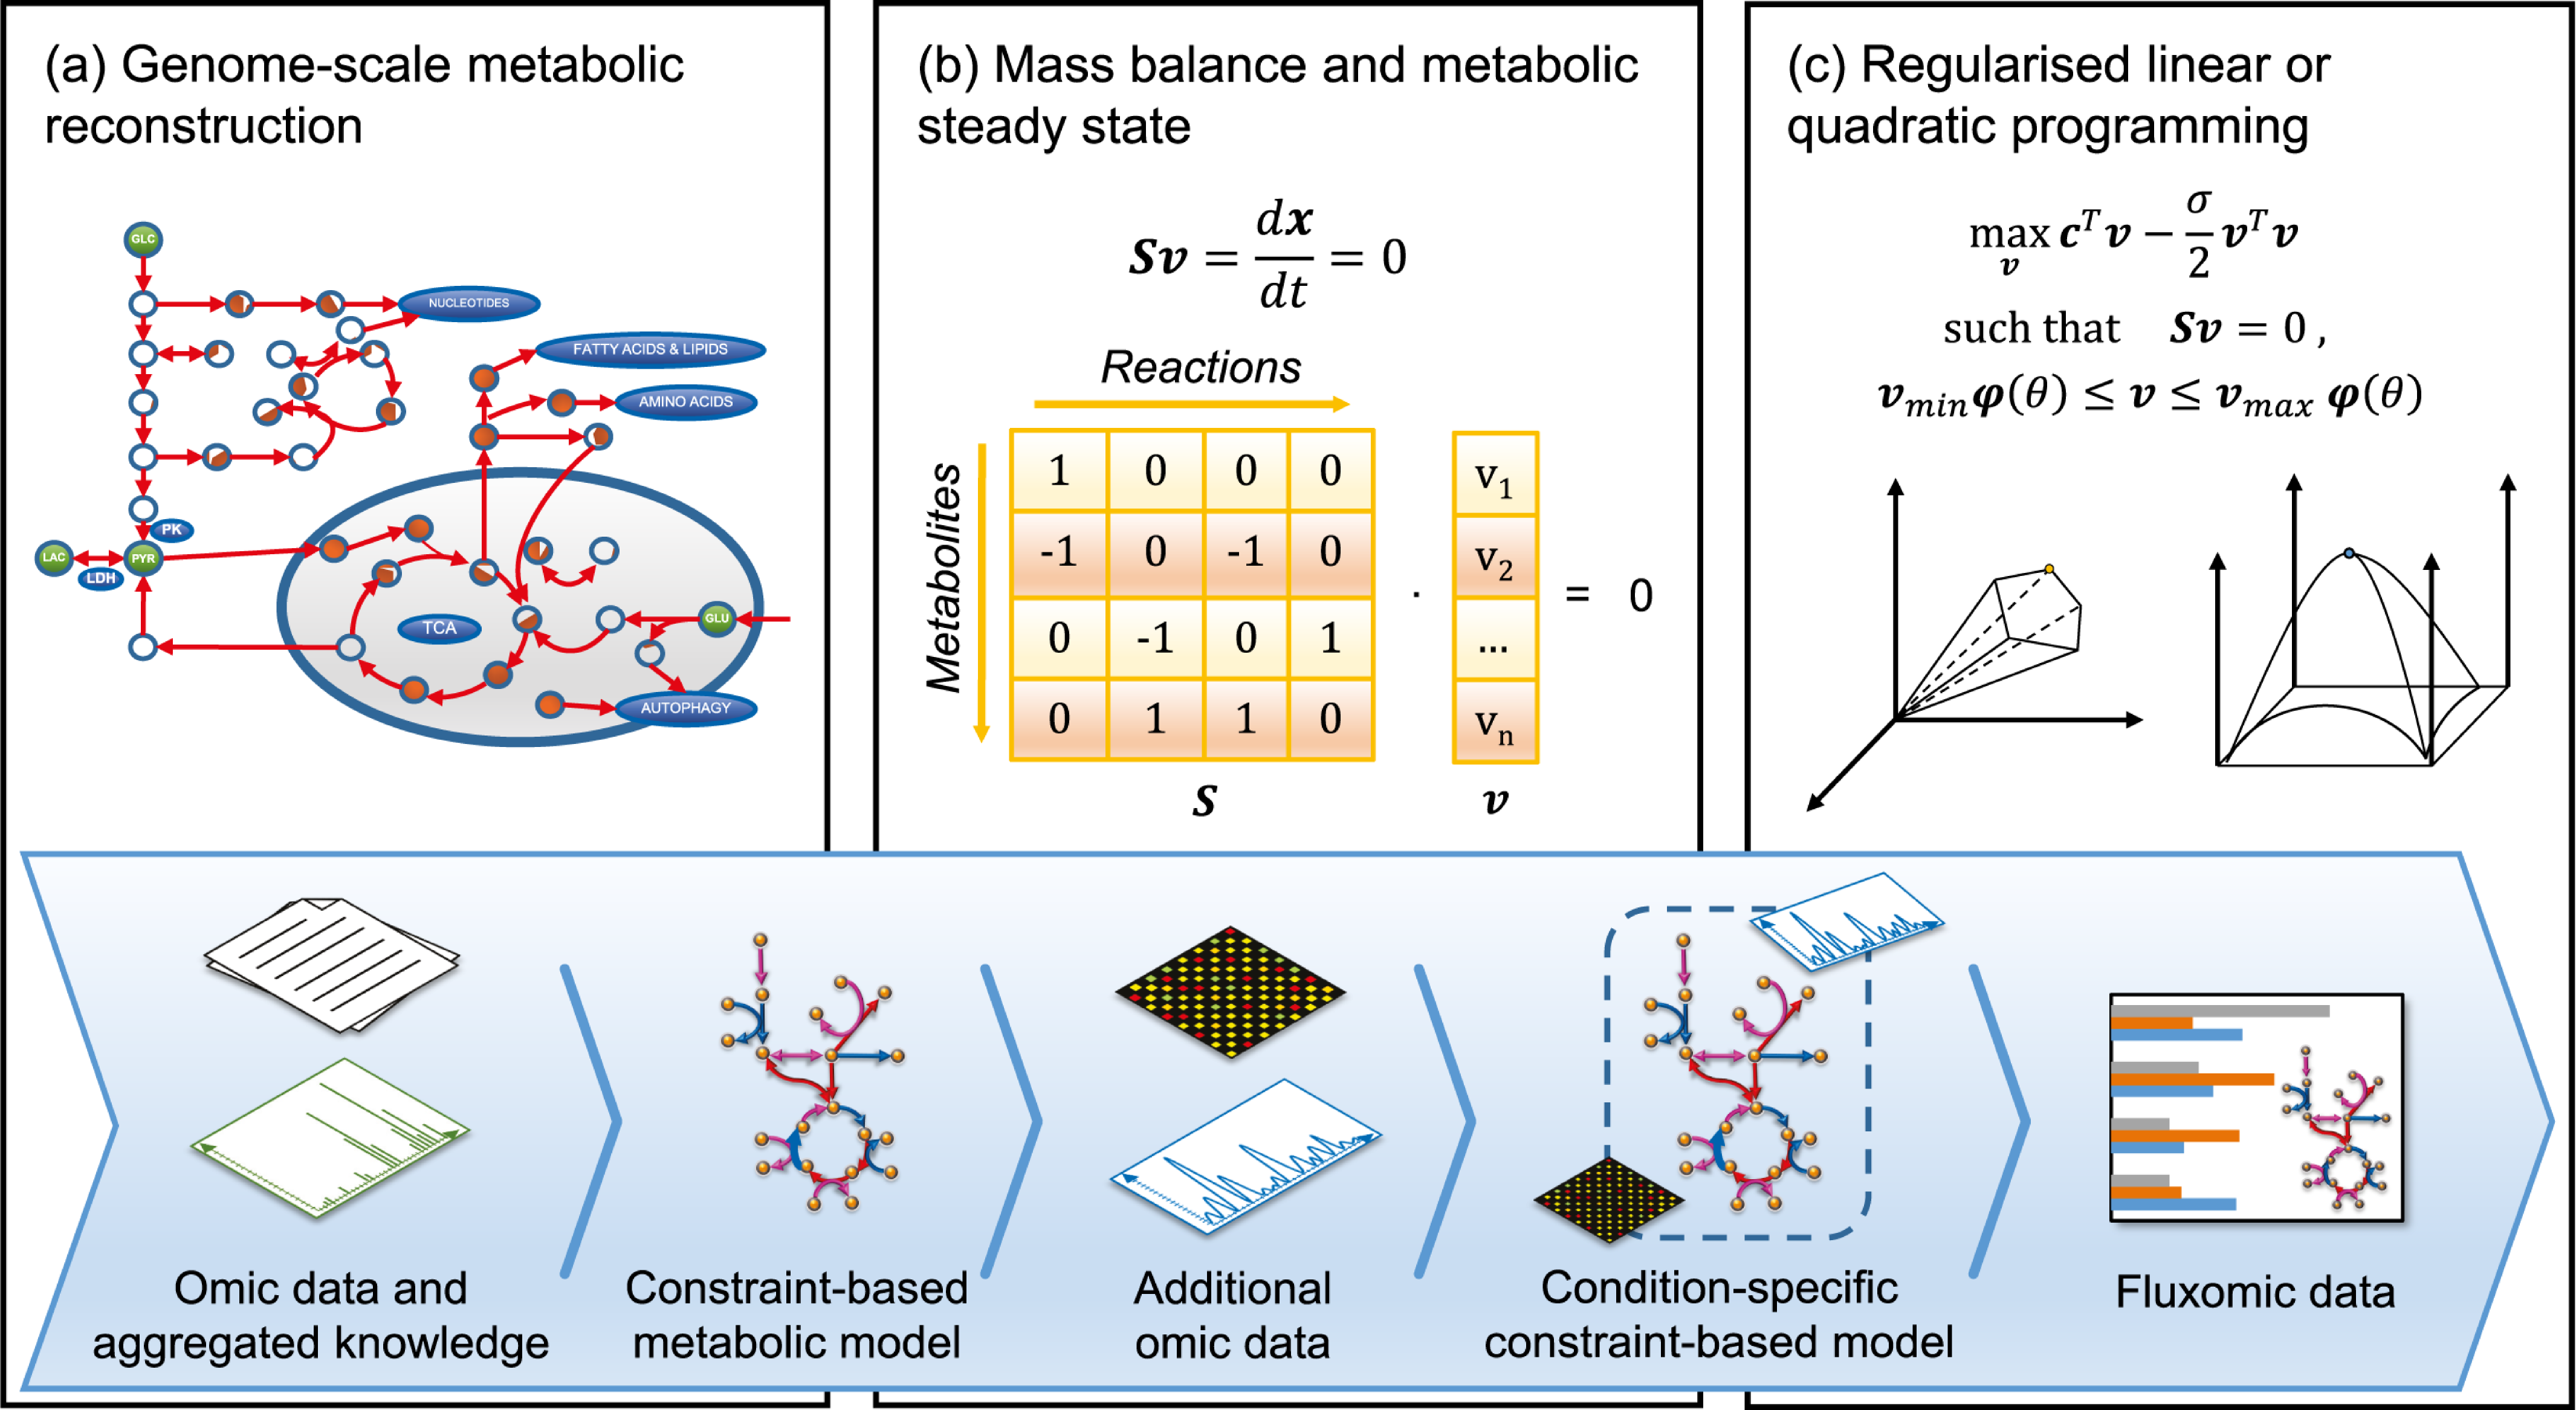

## Loading a model

The COBRApy Toolbox is used to load a model in a jupyter notebook. COBRApy is a python package that provides a simple interface to metabolic constraint-based reconstruction and analysis. The package includes simple, object-oriented interfaces for model construction (including reading to/from sbml, matlab, and json formats) and implements commonly used COBRA methods such as flux balance analysis, flux variability analysis, and gene deletion analyses.

In [1]:
pip install cobra

Note: you may need to restart the kernel to use updated packages.


In [2]:
from cobra.io import read_sbml_model

The next step is to load a genome-scale model. The ecoli_core_model serves as an example. This is available at http://bigg.ucsd.edu/models/e_coli_core. Download the SBML file (xml) and then go to the home tab of the jupyter notebook. There you can upload the SBML file of this model by clicking the "Upload" button. You can now use this model for further work within the jupyter notebook.Then go back to the tab "Course GEM and FBA 1 - Getting started". The model can now be loaded.

In [3]:
model=read_sbml_model('e_coli_core.xml')

## Model content

### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [4]:
model.metabolites[0:10]

[<Metabolite glc__D_e at 0x217e810d6c8>,
 <Metabolite gln__L_c at 0x217e8119488>,
 <Metabolite gln__L_e at 0x217ef601ac8>,
 <Metabolite glu__L_c at 0x217ef6059c8>,
 <Metabolite glu__L_e at 0x217ef60d648>,
 <Metabolite glx_c at 0x217ef60d888>,
 <Metabolite h2o_c at 0x217ef60f3c8>,
 <Metabolite h2o_e at 0x217ef60f4c8>,
 <Metabolite h_c at 0x217ef60fd48>,
 <Metabolite h_e at 0x217ef610fc8>]

Command [0:10] indicates that reactions one to ten are displayed. The number of reactions can be changed by specifying other values in the square brackets. For example, if the reactions 5 to 30 are to be displayed, the command looks like this: [4:30]. If you want to display all the metabolites of the model, you can simply omit [0:10]. 

If you want to know how many metabolites are contained in the model, use the "len" command. There are 72 metabolites in the model.

In [5]:
len(model.metabolites)

72

One can access a specific metabolite using dot notation.

In [6]:
model.metabolites.g3p_c

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x0217f0616a88
Formula,C3H5O6P
Compartment,c
In 7 reaction(s),"TKT2, BIOMASS_Ecoli_core_w_GAM, FBA, GAPD, TALA, TPI, TKT1"


If this command should not be recognized directly, you have to enter "get_by_id".

In [7]:
model.metabolites.get_by_id('h2o_c')

Metabolite identifier,h2o_c
Name,H2O H2O
Memory address,0x0217ef60f3c8
Formula,H2O
Compartment,c
In 18 reaction(s),"ATPS4r, GLNabc, H2Ot, CYTBD, GLUN, MALS, CS, ACONTb, PPC, BIOMASS_Ecoli_core_w_GAM, GLUDy, PPS, FBP, FUM, PGL, ATPM, ACONTa, ENO"


Metabolites are associated with compartments in the cell. Glyceraldehyde 3-phosphate (g3p_c) is associated with the c (Cytosol) compartment.

In [8]:
model.metabolites.g3p_c.compartment

'c'

Use the following command to display all compartments that the model includes.

In [9]:
model.compartments

{'e': 'extracellular space', 'c': 'cytosol'}

The full name of the metabolite is available via the .name attribute.

In [10]:
model.metabolites.g3p_c.name

'Glyceraldehyde 3-phosphate'

One can look up the molecular formula of glucose.

In [11]:
model.metabolites.g3p_c.formula

'C3H5O6P'

The .elements attribute returns a dictionary representation of the formula.

In [12]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

Furthermore, one can look up the molecular weight of a metabolite.

In [13]:
model.metabolites.g3p_c.formula_weight

168.041961

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [14]:
model.metabolites.g3p_c.annotation

{'sbo': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'biocyc': 'META:GAP',
 'chebi': ['CHEBI:5446',
  'CHEBI:14333',
  'CHEBI:12984',
  'CHEBI:181',
  'CHEBI:17138',
  'CHEBI:21026',
  'CHEBI:12983',
  'CHEBI:18324',
  'CHEBI:58027',
  'CHEBI:59776',
  'CHEBI:29052'],
 'hmdb': 'HMDB01112',
 'inchi_key': 'LXJXRIRHZLFYRP-VKHMYHEASA-L',
 'kegg.compound': ['C00661', 'C00118'],
 'metanetx.chemical': 'MNXM74',
 'reactome.compound': '29578',
 'sabiork': ['27', '1687'],
 'seed.compound': ['cpd00102', 'cpd19005']}

One can use these annotations to look up the compound on KEGG for example.

Metabolites are not isolated things. They participate in reactions as substrates and products. The following command displays all reactions containing the metabolite glyceraldehyde 3-phosphate.

In [15]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction BIOMASS_Ecoli_core_w_GAM at 0x217f06bd648>,
           <Reaction FBA at 0x217f070fa48>,
           <Reaction GAPD at 0x217f071f448>,
           <Reaction TALA at 0x217f06e6888>,
           <Reaction TKT1 at 0x217f06eeb88>,
           <Reaction TKT2 at 0x217f06f09c8>,
           <Reaction TPI at 0x217f06f62c8>})

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [16]:
model.reactions[0:10]

[<Reaction PFK at 0x217f0678788>,
 <Reaction PFL at 0x217f0678308>,
 <Reaction PGI at 0x217f067e6c8>,
 <Reaction PGK at 0x217f06817c8>,
 <Reaction PGL at 0x217f0681f08>,
 <Reaction ACALD at 0x217f0689488>,
 <Reaction AKGt2r at 0x217f068b708>,
 <Reaction PGM at 0x217f068d7c8>,
 <Reaction PIt2r at 0x217f0690448>,
 <Reaction ALCD2x at 0x217f0690548>]

In [17]:
len(model.reactions)

95

Let's take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (g3p).

In [18]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction.id, reaction, reaction.name)

TKT2 TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c Transketolase
BIOMASS_Ecoli_core_w_GAM BIOMASS_Ecoli_core_w_GAM: 1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c Biomass Objective Function with GAM
FBA FBA: fdp_c <=> dhap_c + g3p_c Fructose-bisphosphate aldolase
GAPD GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase
TALA TALA: g3p_c + s7p_c <=> e4p_c + f6p_c Transaldolase
TPI TPI: dhap_c <=> g3p_c Triose-phosphate isomerase
TKT1 TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c Transketolase


In [19]:
model.reactions.TKT2.name

'Transketolase'

## Gene-Protein-Reaction associations¶


Glyceraldehyde-3-phosphate dehydrogenase is associated with a single gene. If you want to know which gene it is, you can enter the following command: 

In [20]:
model.reactions.GAPD.gene_reaction_rule

'b1779'

Phosphofructokinase (PFK) on the other hand seems to be associated with two isozymes.

In [21]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [22]:
model.reactions.PFK.name

'Phosphofructokinase'

In [23]:
model.reactions.PFK.gene_name_reaction_rule

'pfkA or pfkB'

## Finding things


One can use .query('search term', 'attribute_to_search_in') to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term glucose in their name.

In [24]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)

## The stoichiometric matrix S

In [25]:
from cobra.util import create_stoichiometric_matrix
s=create_stoichiometric_matrix(model)
s

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.]])

This is how the the stoichiometry matrix S looks like when visualized as a matrix plot. For this representation matplotlib is used. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [26]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


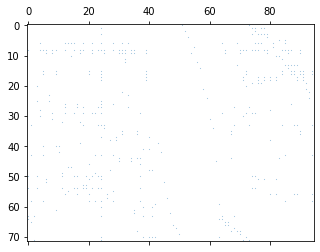

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(s, precision=0.01, markersize=.1)

## Simulating models

In a flow balance analysis, the aim is to achieve a specific objective which is set in advance. If you want to display this target, enter the command below:

In [28]:
print(model.objective)

Maximize
1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5


In this case the stoichiometric processes of the e.coli_core_model are considered, which are responsible for biomass production and this production should be increased.

The following command displays all reactions and flows that are optimised to achieve this goal: 

In [29]:
model.optimize()

,fluxes,reduced_costs
PFK,7.477382,-1.387779e-17
PFL,0.000000,2.081668e-17
PGI,4.860861,0.000000e+00
PGK,-16.023526,6.938894e-18
PGL,4.959985,1.517883e-17
...,...,...
NADH16,38.534610,0.000000e+00
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,-1.387779e-17
O2t,21.799493,0.000000e+00


Sometimes a solution cannot be found. For example, setting the lower bound of the objective function to a very high value that the model cannot achieve will trigger a warning when trying to optimize the model. Parameters reported from an infeasible model are not meaningful to interpret (except in rare occasions when you may want to figure out why a model is infeasible).

All commands that have just been presented for the metabolites and reactions can of course also be used for the genes, for example:

In [30]:
model.genes[0:10]

[<Gene b1241 at 0x217f061f508>,
 <Gene b0351 at 0x217f061f548>,
 <Gene s0001 at 0x217f061f5c8>,
 <Gene b1849 at 0x217f061fb48>,
 <Gene b3115 at 0x217f0626048>,
 <Gene b2296 at 0x217f0626188>,
 <Gene b1276 at 0x217f0626648>,
 <Gene b0118 at 0x217f0626c08>,
 <Gene b0474 at 0x217f0628148>,
 <Gene b0116 at 0x217f0628688>]